# TSNE visualization

In [19]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import pickle
import matplotlib.colors as mcolors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

dic = torch.load('result.pth', map_location='cpu')
with open('intent2id_multi_se_with_tokens.pkl', 'rb') as f:
    label_names = pickle.load(f)
label_names = list(label_names.keys())
# label_names.append('multiple labels')

## Get data

In [60]:
clusters = dic['clusters'] # (25, 768)
clusters_norm = clusters #/ np.sqrt(torch.sum(np.square(clusters), dim=-1, keepdims=True))
outputs = dic['outputs'] # (ns, 25)
labels = dic['labels'] # (ns, 25)

# handle labels
x, y = torch.where(labels==1)
from collections import defaultdict
label_dic = defaultdict(list)
for id_x, id_y in zip(x,y):
    label_dic[id_x.item()].append(id_y.item())

# get labels
onelabel = []
for k,v in label_dic.items():
    if len(v) > 1:
        onelabel.append(v[1])
    else:
        onelabel.append(v[0])

# total number of labels
num_label = clusters.shape[0]

In [5]:
# handle points
outputs = torch.sigmoid(outputs)
points = np.dot(outputs.numpy(), clusters_norm)
all_points = np.vstack([clusters_norm, points])

## TSNE

In [6]:
X = clusters_norm.numpy()
X_embedded = TSNE(n_components=2).fit_transform(all_points)
X_embedded.shape

(9067, 2)

## Visualization

In [104]:
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
colors = [name for hsv, name in by_hsv]
print(colors)

['black', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro', 'whitesmoke', 'white', 'snow', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki', 'ivory', 'beige', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'spr

In [122]:
colors = mcolors.CSS4_COLORS
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
colors = [name for hsv, name in by_hsv]
indices = np.random.randint(0,len(colors),num_label)
# indices = np.round(np.linspace(0,len(colors)-1,num_label)).astype(np.int32)
print(indices)
select_colors = np.array(list(colors))[indices]

color_dic = {i:color for i,color in enumerate(select_colors)}

df = pd.DataFrame({'x': X_embedded[num_label:,0], 'y': X_embedded[num_label:,1], 'labels':onelabel})
df['c'] = df.labels.map(color_dic)

[ 60  12  62 135  70 146 134 113  67   4 106 131  46 102 104  93  15   9
  43  33  31 114  86 102 114]


Text(0.5, 1.0, 'TSNE visualization of intent clusters')

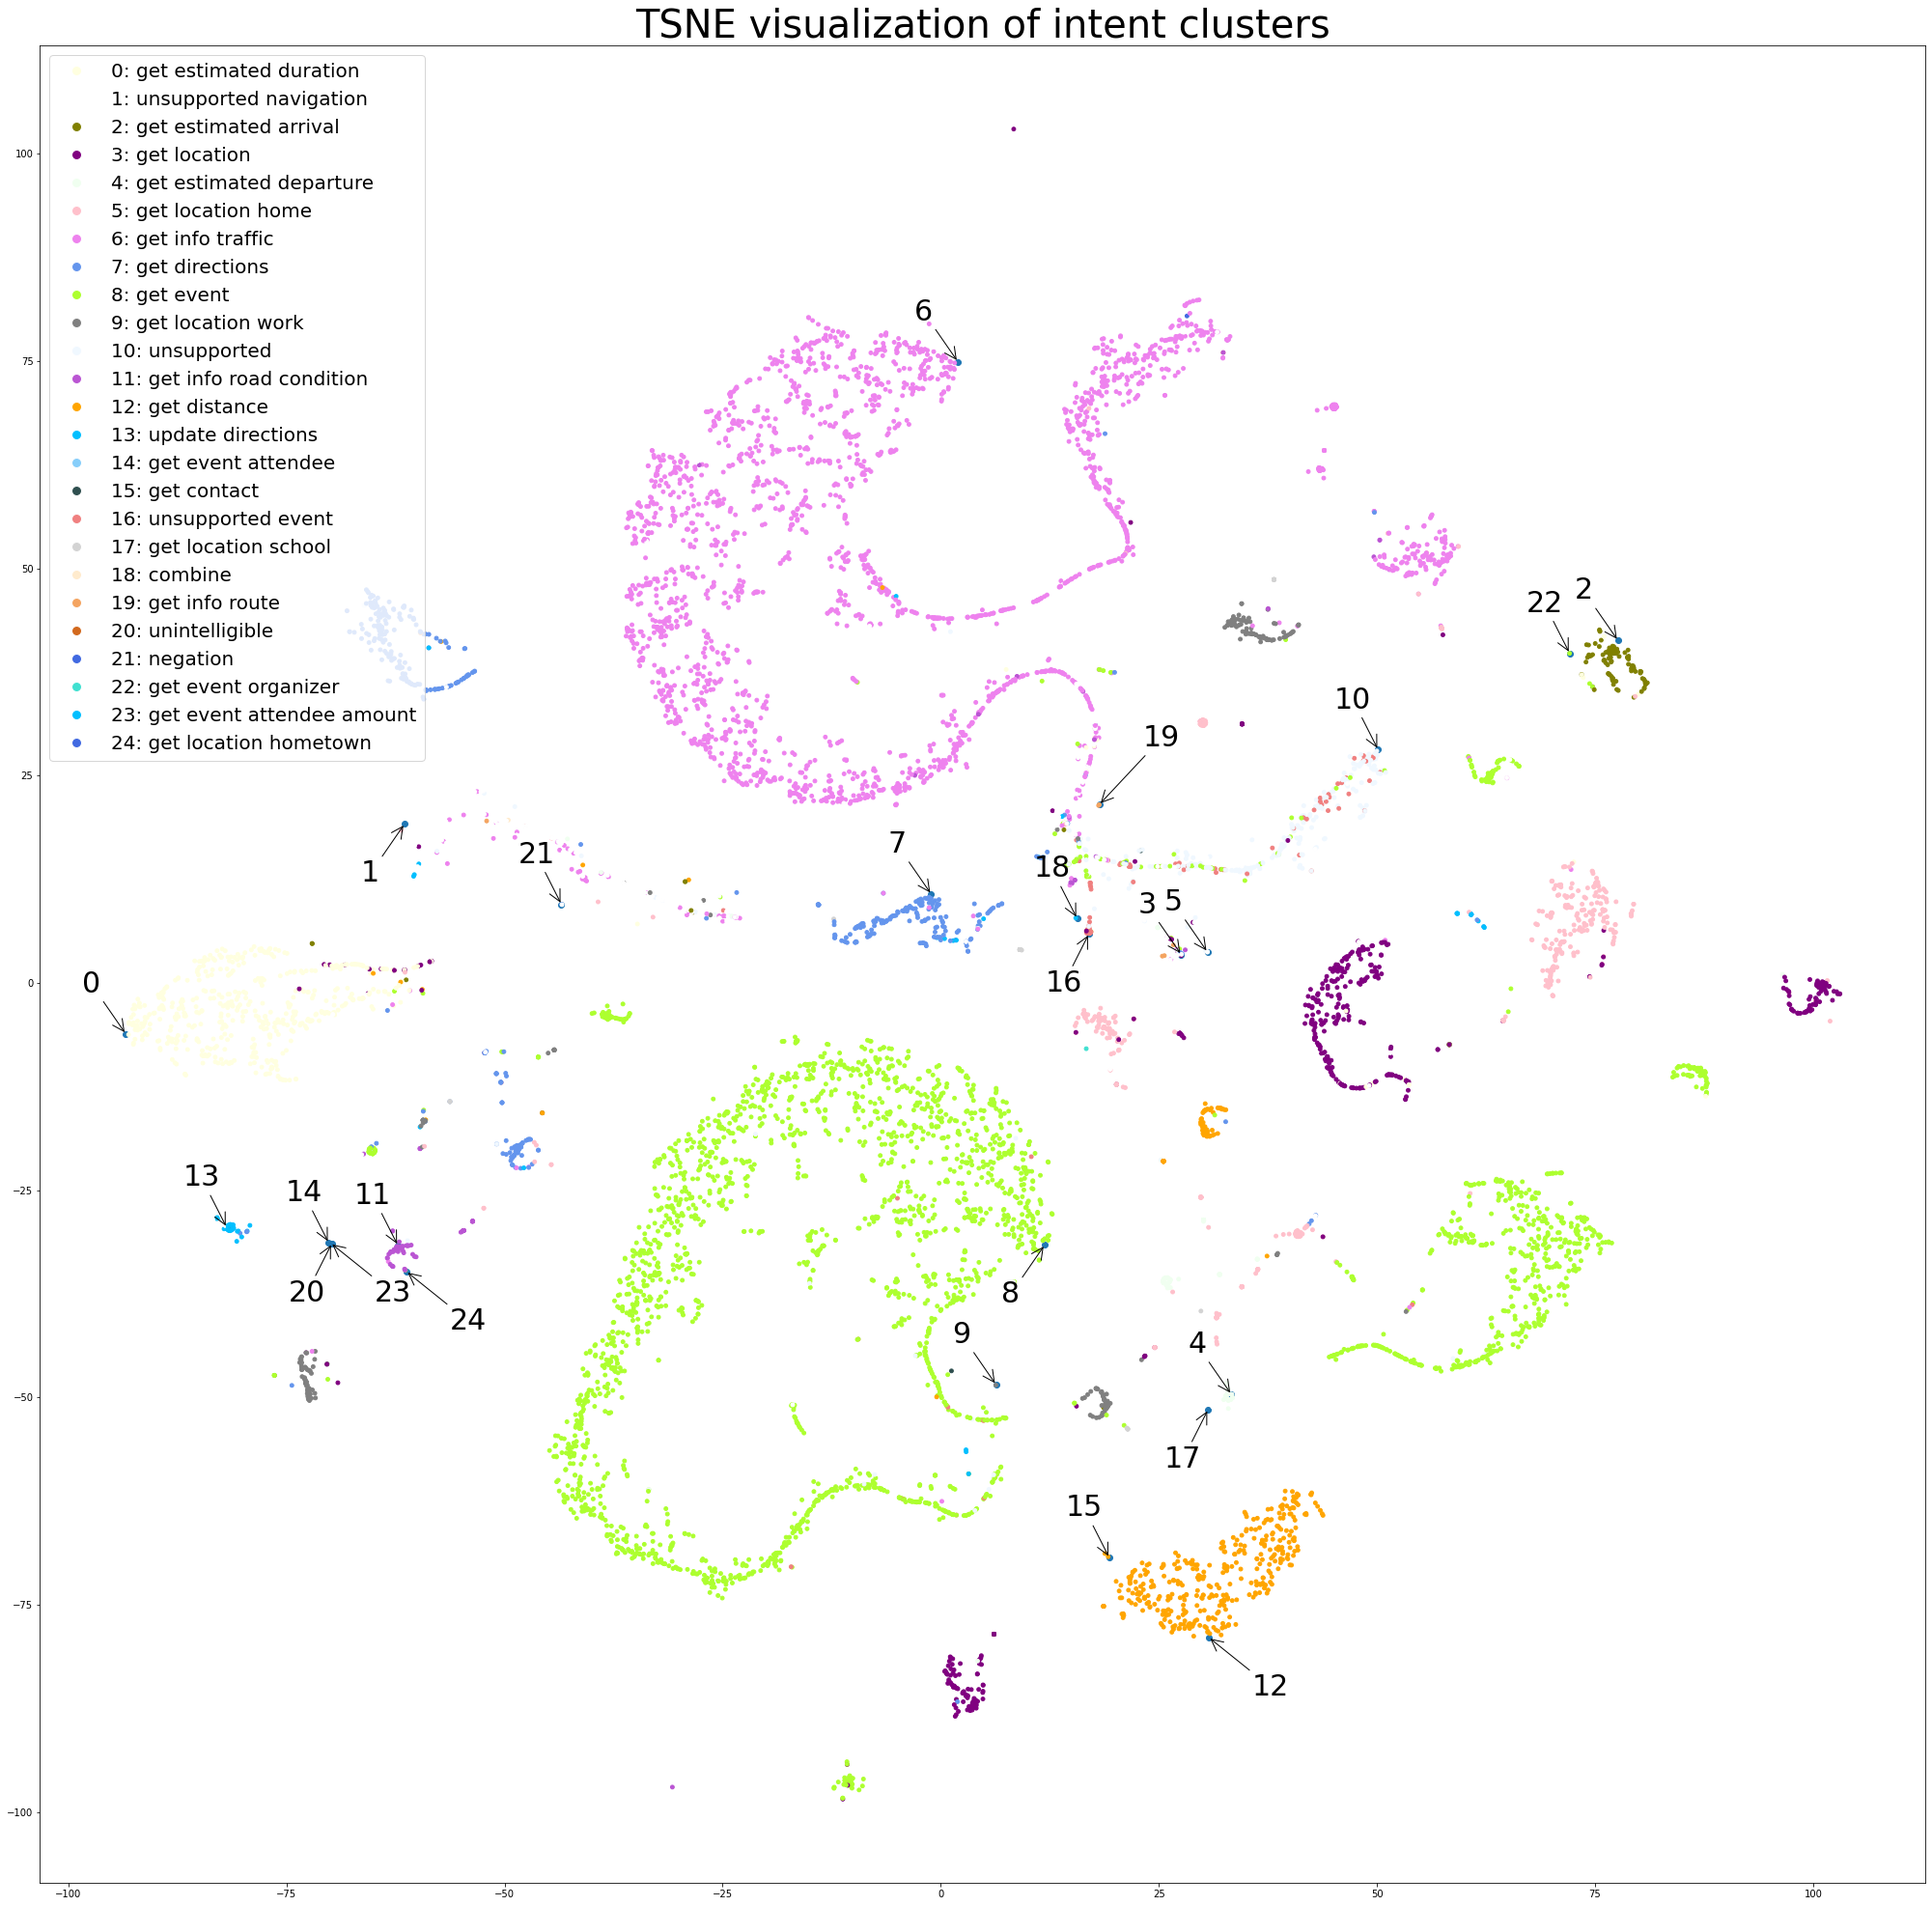

In [123]:
plt.figure(figsize = (35,35))
plt.scatter(X_embedded[:num_label,0], X_embedded[:num_label,1])
n = list(range(num_label))
for i, txt in enumerate(n):
    if i in [16, 20, 17, 1, 8]:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=30, xytext=(X_embedded[i,0]-5, X_embedded[i,1]-7),\
                arrowprops=dict(arrowstyle='->'))
    elif i in [23, 24, 12]:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=30, xytext=(X_embedded[i,0]+5, X_embedded[i,1]-7),\
                arrowprops=dict(arrowstyle='->'))
    elif i in [19]:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=30, xytext=(X_embedded[i,0]+5, X_embedded[i,1]+7),\
                arrowprops=dict(arrowstyle='->'))
    else:
        plt.annotate(txt, (X_embedded[i,0], X_embedded[i,1]), fontsize=30, xytext=(X_embedded[i,0]-5, X_embedded[i,1]+5),\
                arrowprops=dict(arrowstyle='->'))

    
plt.scatter(df.x, df.y, c=df.c, alpha=1, s=15)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='{}: {}'.format(i,label_names[i]), 
               markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(select_colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper left', fontsize=20)
plt.title('TSNE visualization of intent clusters', fontsize=40)
# plt.savefig('Multi-label.jpg')